First five rows of the dataset:
   Unnamed: 0  year  month   intent  police sex   age      race  other  \
0           1  2012      1  Suicide       0   M  34.0  Coloured    100   
1           2  2012      1  Suicide       0   F  21.0     White    100   
2           3  2012      1  Suicide       0   M  60.0     White    100   
3           4  2012      2  Suicide       0   M  64.0     White    100   
4           5  2012      2  Suicide       0   M  31.0     White    100   

             place     education  
0             Home           BA+  
1           Street  Some college  
2  Other specified           BA+  
3             Home           BA+  
4  Other specified        Matric  

Dataset organized by year and month:
     Unnamed: 0  year  month   intent  police sex   age      race  other  \
0             1  2012      1  Suicide       0   M  34.0  Coloured    100   
1             2  2012      1  Suicide       0   F  21.0     White    100   
2             3  2012      1  Suicide       0  

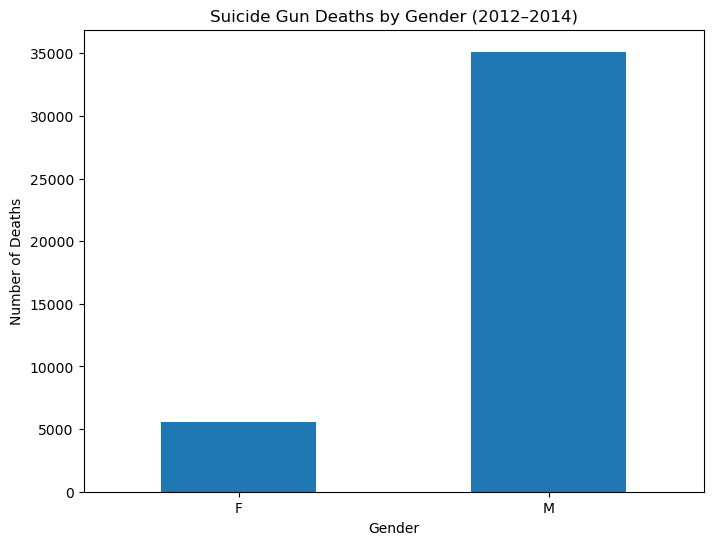

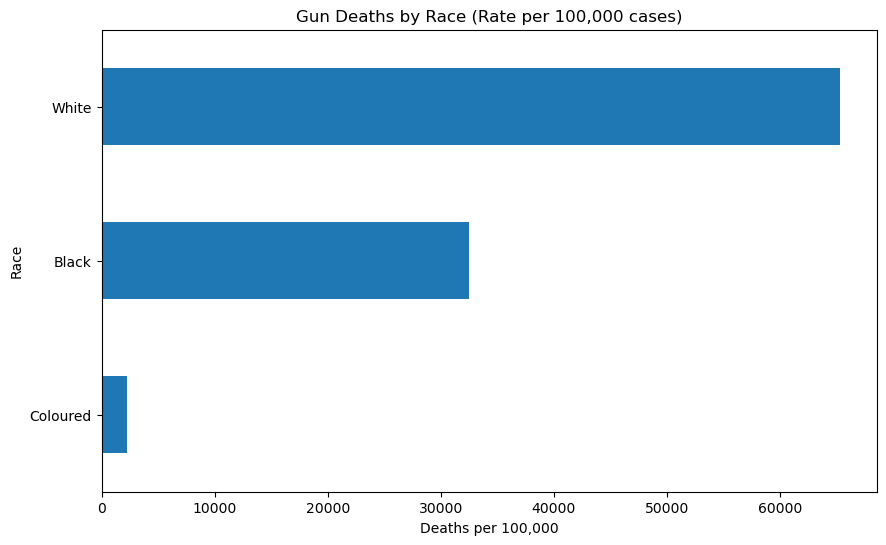

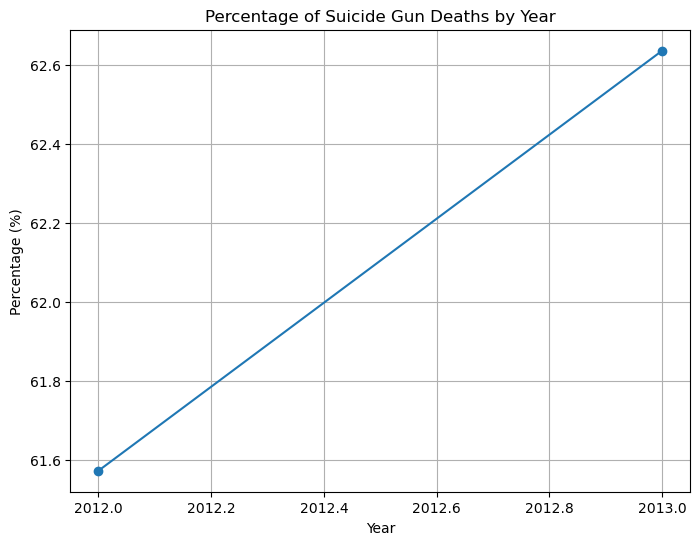

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (relative path for GitHub)
df = pd.read_csv("data/deaths.csv")

# 1.1 Display first five rows
print("First five rows of the dataset:")
print(df.head())

# 1.2 Organize dataset by year and month
df_sorted = df.sort_values(by=["year", "month"])
print("\nDataset organized by year and month:")
print(df_sorted.head())

# 1.3 Number of males and females
gender_counts = df["sex"].value_counts()
print("\nNumber of males and females:")
print(gender_counts)

# 1.4 Number of educated females
educated_females = df[(df["sex"] == "F") & (df["education"].notnull())]
print(f"\nNumber of educated females: {educated_females.shape[0]}")

# 1.5 Annual gun death rates (per 100,000 cases)
annual_deaths = df.groupby("year").size()
rate_per_100k = (annual_deaths / annual_deaths.sum()) * 100000
print("\nAnnual gun death rate per 100,000 cases:")
print(rate_per_100k)

# 2.1 Suicide gun deaths per gender
suicide_deaths_gender = df[df["intent"] == "Suicide"].groupby("sex").size()
print("\nSuicide gun deaths per gender:")
print(suicide_deaths_gender)

# 2.2 Gun deaths by race (per 100,000 cases)
deaths_by_race = df.groupby("race").size()
deaths_by_race_rate = (deaths_by_race / deaths_by_race.sum()) * 100000
print("\nGun deaths by race per 100,000 cases:")
print(deaths_by_race_rate)

# 2.3 Percentage of suicide gun deaths by year
suicide_deaths_year = df[df["intent"] == "Suicide"].groupby("year").size()
suicide_percentage_year = (suicide_deaths_year / annual_deaths) * 100
print("\nPercentage of suicide gun deaths by year:")
print(suicide_percentage_year)


# Visualizations


# Suicide gun deaths by gender
plt.figure(figsize=(8, 6))
suicide_deaths_gender.plot(kind="bar")
plt.title("Suicide Gun Deaths by Gender (2012–2014)")
plt.xlabel("Gender")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=0)
plt.show()

# Gun deaths by race
plt.figure(figsize=(10, 6))
deaths_by_race_rate.sort_values().plot(kind="barh")
plt.title("Gun Deaths by Race (Rate per 100,000 cases)")
plt.xlabel("Deaths per 100,000")
plt.ylabel("Race")
plt.show()

# Suicide percentage by year
plt.figure(figsize=(8, 6))
suicide_percentage_year.plot(marker="o")
plt.title("Percentage of Suicide Gun Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.show()
